In [60]:
import fecon236 as fe # library with tools for financial economics
import pandas as pd
import numpy as np
import requests as req # Webscrapping
from bs4 import BeautifulSoup # Webscrapping
import re # Regex
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose #importing decomposition method
from statsmodels.tsa.stattools import adfuller

In [131]:
df = fe.stock_all('s4itx.mc')[['Close']][:]

 ::  Retrieved from Yahoo Finance: ITX.MC


In [134]:
df.columns = ['price']
df.head()

,price
Date,
2009-08-24,7.574
2009-08-25,7.526
2009-08-26,7.496
2009-08-27,7.374
2009-08-28,7.480


In [136]:
resampled = df.resample('5d').mean()

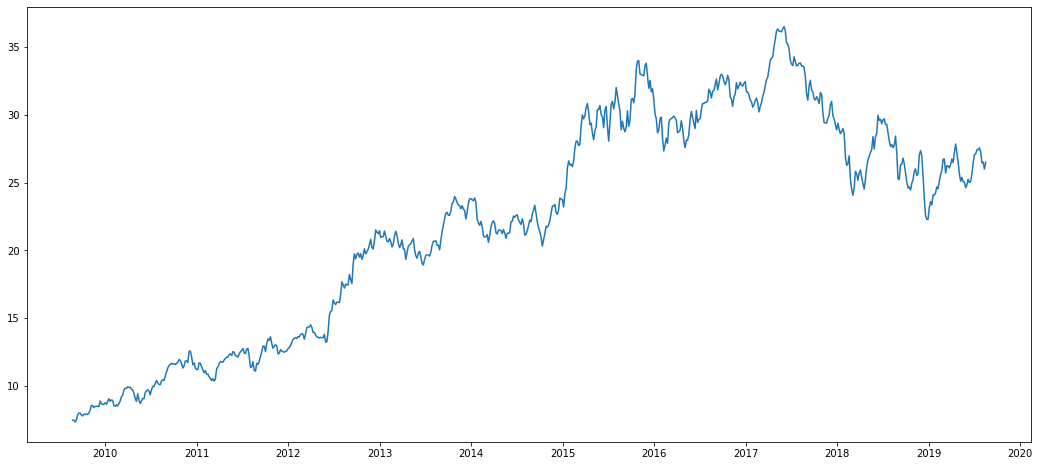

In [137]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8

plt.plot(resampled)

In [148]:
size = int(0.7*resampled.shape[0])
train_set, test_set = resampled['price'][0:size], resampled['price'][size:-1]

In [177]:
mod = ARIMA(train_set, order=(6, 1, 2))

results = mod.fit()

print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  509
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -299.730
Method:                       css-mle   S.D. of innovations              0.435
Date:                Tue, 20 Aug 2019   AIC                            619.459
Time:                        16:39:55   BIC                            661.784
Sample:                    08-29-2009   HQIC                           636.054
                         - 08-12-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0490      0.004     13.926      0.000       0.042       0.056
ar.L1.D.price     0.2236      0.065      3.460      0.001       0.097       0.350
ar.L2.D.price     0.7356      0.071     

In [185]:
preds = results.predict(start= test_set.index[0], end=test_set.index[19])

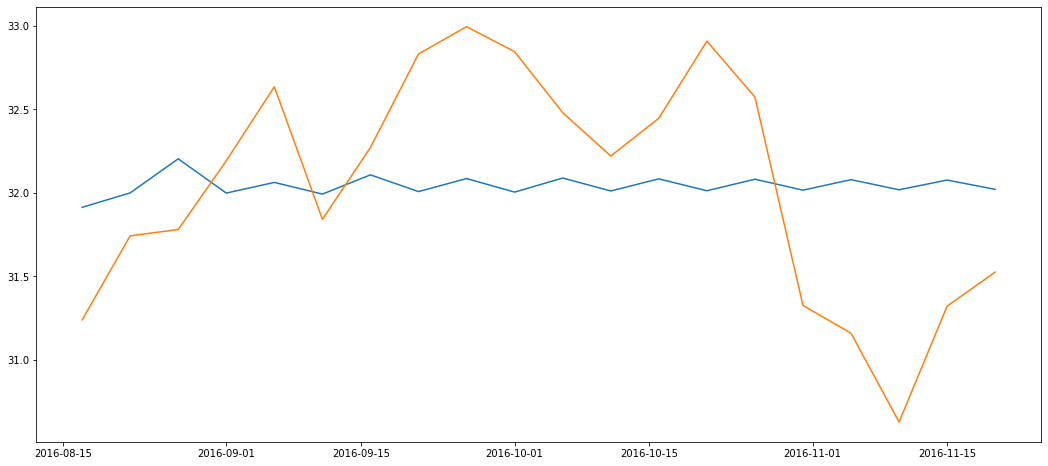

In [188]:
plt.plot(preds+32)
plt.plot(test_set[:20])

In [138]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = resampled['price']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  729
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -493.449
Method:                       css-mle   S.D. of innovations              0.476
Date:                Tue, 20 Aug 2019   AIC                           1000.897
Time:                        16:19:43   BIC                           1033.039
Sample:                    08-29-2009   HQIC                          1013.299
                         - 08-17-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0262      0.020      1.330      0.184      -0.012       0.065
ar.L1.D.price     0.2299      0.037      6.205      0.000       0.157       0.303
ar.L2.D.price    -0.1471      0.038     

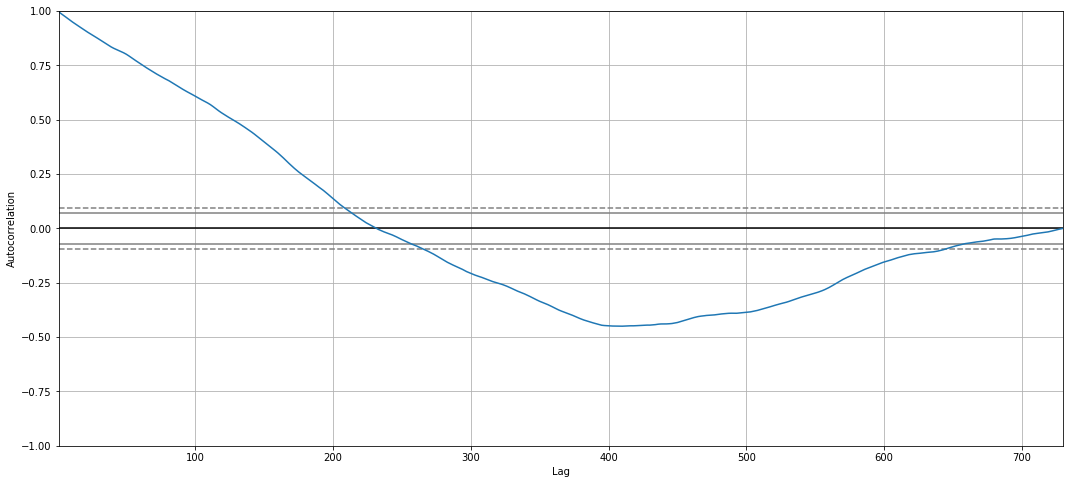

<Figure size 800x560 with 0 Axes>

In [139]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

In [124]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [140]:
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

size = int(len(df) * 0.66)
train, test = resampled['price'][0:size], df['price'][size:len(X)]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on cabk stock')
plt.legend()
plt.show()